In [8]:
HOSTNAME = "rp-f071a9.local" # hostname of the red pitaya

In [10]:
from pyrpl import Pyrpl
import numpy as np
import time
import matplotlib.pyplot as plt

p = Pyrpl('test', hostname=HOSTNAME, gui=False)
r = p.rp
s = r.scope

# Some good default settings
s.input1 = 'in1'
s.input2 = 'in2'
s.decimation = 1024 # or s.duration =0.01
s.average = True
s.trigger_source = 'immediately'

INFO:pyrpl:All your PyRPL settings will be saved to the config file
    /Users/gsteele/pyrpl_user_dir/config/test.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe test" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('test')
in a python terminal.
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname rp-f071a9.local.


# Testing acquisition times

In recent tests of my scope software, it seems like I am running into very long acquisition times using the python3 library. Here, I want to check this out in more detail. I will also compare the standard API calls with the internal ones. 

## `single()`

In [11]:
s.duration

0.134217728

In [12]:
t0 = time.time()
s.single()
print(time.time()-t0)

2.959645986557007


OK, that is a bit unexpected: it takes 3 seconds, while acquisition duration is only 134 ms!

## `_get_trace`

In [13]:
t0 = time.time()
s._get_trace()
print(time.time()-t0)

0.011983871459960938


This returns almost immediately (12 ms), but of course, it will not ensure that the returned trace includes a fully new acquisition trace. 

Let's demonstrate that: I have configured output to feed into input with an SMA cable. 

In [29]:
r.asg0.output_direct = 'out1'
r.asg0.setup(frequency=10, amplitude=0.5, waveform='sin', trigger_source='immediately')

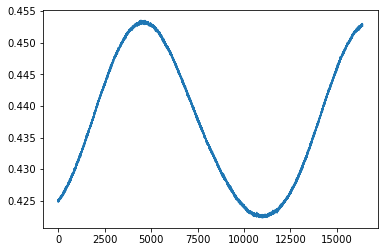

In [45]:
v,_ = s.single()
plt.plot(v)

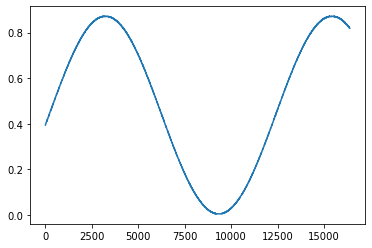

In [58]:
v,_ = s._get_trace()
plt.plot(v)

In [60]:
r.asg0.

[]